In [286]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Linear regression with one variable

In [287]:
df = pd.read_csv(r'G:\360MoveData\Users\Administrator\Desktop\path_data\path_jupyter\ex1\ex1data1.txt',names=['population','profit'])

In [288]:
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [290]:
print(df.columns)

Index(['population', 'profit'], dtype='object')


Text(0, 0.5, 'profit')

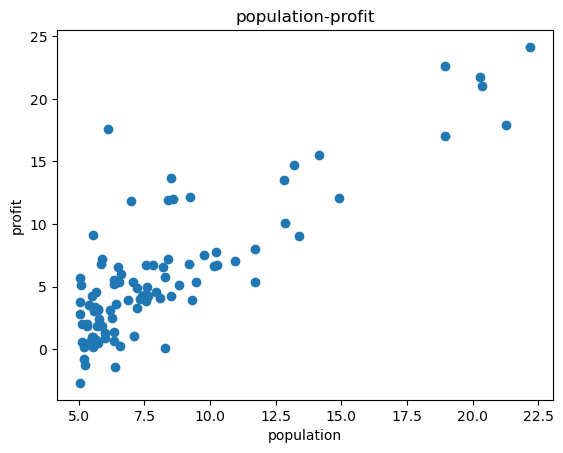

In [291]:
plt.figure()
plt.scatter(df['population'],df['profit'])
plt.title('population-profit')
plt.xlabel('population')
plt.ylabel('profit')

In [292]:
x = df['population']   #按索引取出转化为矩阵是行向量
y = df['profit']
x.info()

<class 'pandas.core.series.Series'>
RangeIndex: 97 entries, 0 to 96
Series name: population
Non-Null Count  Dtype  
--------------  -----  
97 non-null     float64
dtypes: float64(1)
memory usage: 904.0 bytes


In [293]:
# set data
x = df['population']
y = df['profit']
# transform matrix
# to be column vector
x = np.matrix(x.values).T
m = x.shape[0]
mOnes = np.ones((m,1))

x = np.concatenate((x,mOnes),axis=1)
y = np.matrix(y.values).T

In [294]:
def linearRegression(x,w,b):
    #:row vectot
    
    theta = np.matrix(np.array([w,b])).T
    y = x * theta

    #m = x.shape[0]
    #mOnes = np.ones((m,1))
    #X = np.concatenate((x,mOnes),axis=1)
    #parameter = np.matrix(np.array([w,b])).T
    #theta = np.matrix(np.array([1,1]))
    #y_pridicte = linearRegression(x,theta[0].tolist()[0][0],theta[0].tolist()[0][1])
    
    # the result is column vector
    return y

In [295]:
def computeCost(realY,predicateY):

    m =realY.shape[0]
    arrCost = np.power(realY-predicateY,2)
    cost = np.sum(arrCost)/(2*m)
    
    return cost 

In [296]:
def gradientDescent(x,y,iteration,learningRate):

    # x:变量
    # y:实际值
    # iteration：迭代次数
    # learningRate:学习率
    
    cost = np.zeros(iteration) #初始化成本矩阵,记录每一次迭代的成本值
    theta = np.matrix(np.zeros([2,1])) #初始化参数矩阵[w,b],列向量
    temp_theta = theta # 初始化暂存参数矩阵
    
    m = x.shape[0] # 计算输入变量长度

    predicteY = linearRegression(x,theta[0,0],theta[1,0])
    cost[0] =computeCost(y,predicteY)
    
    count = 1
    while count < iteration:

        distance = linearRegression(x,theta[0,0],theta[1,0])-y #计算线性模型结果与实际结果的差异
        
        theta[0,0] = theta[0,0] - np.multiply(distance, x[:,0]).sum()* learningRate/m
        theta[1,0] = theta[1,0] - distance.sum()* learningRate/m
        
        predicteY = linearRegression(x,theta[0,0],theta[1,0])
        cost[count] = computeCost(y,predicteY)
        #cost = computeCost(y,predicteY)
        
        count = count + 1
    
    return cost,theta

In [297]:
cost,theta = gradientDescent(x,y,1000,0.01)

In [298]:
cost

array([32.07273388,  6.73719046,  5.93159357,  5.90115471,  5.89522859,
        5.89009494,  5.88500416,  5.87993248,  5.87487909,  5.86984391,
        5.86482687,  5.85982789,  5.85484692,  5.84988389,  5.84493874,
        5.8400114 ,  5.83510181,  5.8302099 ,  5.82533562,  5.82047889,
        5.81563965,  5.81081784,  5.8060134 ,  5.80122627,  5.79645638,
        5.79170367,  5.78696808,  5.78224955,  5.77754801,  5.77286341,
        5.76819568,  5.76354477,  5.75891061,  5.75429313,  5.7496923 ,
        5.74510803,  5.74054027,  5.73598897,  5.73145406,  5.72693549,
        5.72243319,  5.71794711,  5.71347718,  5.70902336,  5.70458558,
        5.70016379,  5.69575792,  5.69136792,  5.68699373,  5.6826353 ,
        5.67829257,  5.67396548,  5.66965398,  5.665358  ,  5.6610775 ,
        5.65681242,  5.6525627 ,  5.64832829,  5.64410913,  5.63990517,
        5.63571635,  5.63154261,  5.62738391,  5.6232402 ,  5.6191114 ,
        5.61499748,  5.61089837,  5.60681403,  5.60274441,  5.59

In [299]:
theta

matrix([[ 1.12717549],
        [-3.24022043]])

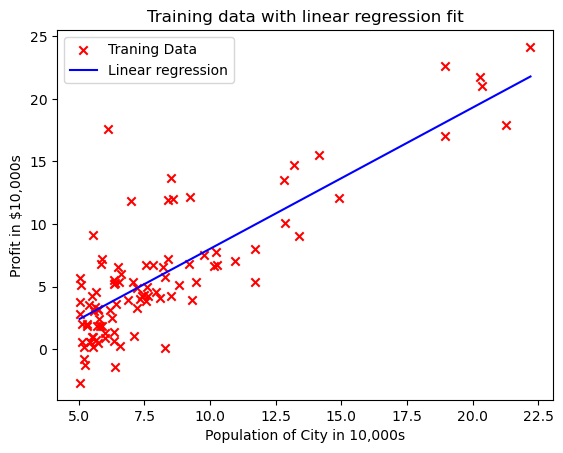

In [300]:
linerregression_x = np.linspace(min(df['population']), max(df['population']), 1000)  
linerregression_y = linerregression_x * theta[0,0] + theta[1,0]
plt.figure()
plt.title('Training data with linear regression fit')
plt.scatter(df['population'],df['profit'],color = 'r',marker = 'x',label='Traning Data')
plt.plot(linerregression_x,linerregression_y,color = 'b',label='Linear regression')
plt.legend(loc=2)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

In [301]:
#profits in areas of 35,000
predicate_35 = np.matrix(np.array([35,1]))
#profits in areas of 35,000
predicate_70 = np.matrix(np.array([70,1]))

In [302]:
theta

matrix([[ 1.12717549],
        [-3.24022043]])

In [303]:
predicate_result_35 = predicate_35*theta
predicate_result_70 = predicate_70*theta
print('profits in areas of 35,000 is',predicate_result_35[0,0])
print('profits in areas of 70,000 is',predicate_result_70[0,0])

profits in areas of 35,000 is 36.210921603853464
profits in areas of 70,000 is 75.66206364146339


In [304]:
cost.shape

(1000,)

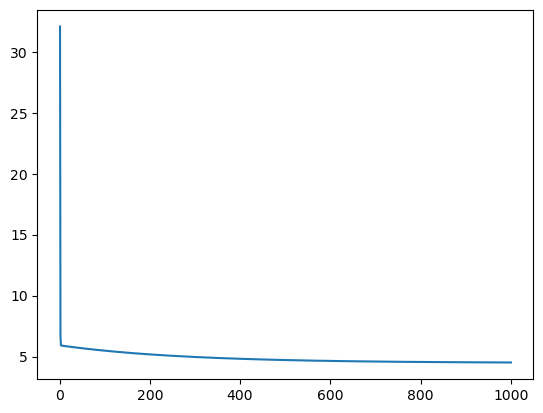

In [305]:
iteration_x = np.linspace(1, 1000, 1000)
plt.figure()
plt.plot(iteration_x,cost,label='Error sum of squares')

# Linear regression with multiple variables

In [306]:
path_ex1data2 = r'G:\360MoveData\Users\Administrator\Desktop\path_data\path_jupyter\ex1\ex1data2.txt'

In [307]:
data = pd.read_csv(path_ex1data2,names=['size of the house','the number of bedrooms','the price of the house'])
data.head()

,size of the house,the number of bedrooms,the price of the house
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [308]:
data.columns

Index(['size of the house', 'the number of bedrooms',
       'the price of the house'],
      dtype='object')

In [309]:
x1 = np.matrix(data['size of the house']).T
x2 = np.matrix(data['the number of bedrooms']).T
y = np.matrix(data['the price of the house']).T

## 特征缩放

In [310]:
data.describe()

,size of the house,the number of bedrooms,the price of the house
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [311]:
x1 = (x1 - x1.mean())/x1.std()
x2 = (x2 - x2.mean())/x2.std()

In [312]:
ones_matrix = np.matrix(np.ones(len(x1))).T

In [361]:
xM = np.concatenate((x1,x2,ones_matrix),axis=1)

thetaMultiple = np.matrix(np.zeros(3)).T
xM

matrix([[ 1.31415422e-01, -2.26093368e-01,  1.00000000e+00],
        [-5.09640698e-01, -2.26093368e-01,  1.00000000e+00],
        [ 5.07908699e-01, -2.26093368e-01,  1.00000000e+00],
        [-7.43677059e-01, -1.55439190e+00,  1.00000000e+00],
        [ 1.27107075e+00,  1.10220517e+00,  1.00000000e+00],
        [-1.99450507e-02,  1.10220517e+00,  1.00000000e+00],
        [-5.93588523e-01, -2.26093368e-01,  1.00000000e+00],
        [-7.29685755e-01, -2.26093368e-01,  1.00000000e+00],
        [-7.89466782e-01, -2.26093368e-01,  1.00000000e+00],
        [-6.44465993e-01, -2.26093368e-01,  1.00000000e+00],
        [-7.71822042e-02,  1.10220517e+00,  1.00000000e+00],
        [-8.65999486e-04, -2.26093368e-01,  1.00000000e+00],
        [-1.40779041e-01, -2.26093368e-01,  1.00000000e+00],
        [ 3.15099326e+00,  2.43050370e+00,  1.00000000e+00],
        [-9.31923697e-01, -2.26093368e-01,  1.00000000e+00],
        [ 3.80715024e-01,  1.10220517e+00,  1.00000000e+00],
        [-8.65782986e-01

In [314]:
thetaMultiple

matrix([[0.],
        [0.],
        [0.]])

In [372]:
def linerRegressionM(x,thetaM):
    y = x * thetaM

    return y

In [376]:
def gradientDescentMultiple(x,y,iteration,learningRate):

    # x:变量
    # y:实际值
    # iteration：迭代次数
    # learningRate:学习率
    
    cost = np.zeros(iteration) #初始化成本矩阵,记录每一次迭代的成本值
    thetaM = np.matrix(np.zeros([x.shape[1],1])) #初始化参数矩阵[w1,w2,b],列向量
    temp_theta = theta # 初始化暂存参数矩阵
    
    m = x.shape[0] # 计算输入变量长度

    predicteY = linerRegressionM(x,thetaM)
    cost[0] =computeCost(y,predicteY)
    
    count = 1
    while count < iteration:

        distance = linerRegressionM(x,thetaM)-y #计算线性模型结果与实际结果的差异


        for j in range(thetaM.shape[0]):
            thetaM[j,0] = thetaM[j,0] - np.multiply(distance, x[:,j]).sum()*learningRate/ m

        
        predicteY = linerRegressionM(x,thetaM)
        cost[count] = computeCost(y,predicteY)
        #cost = computeCost(y,predicteY)
        
        count = count + 1
    
    return cost,thetaM

In [438]:
iteration = 1500
learningRate = 0.01

In [439]:
costM,thetaM = gradientDescentMultiple(xM,y,iteration,learningRate)

Text(0, 0.5, 'Cost J')

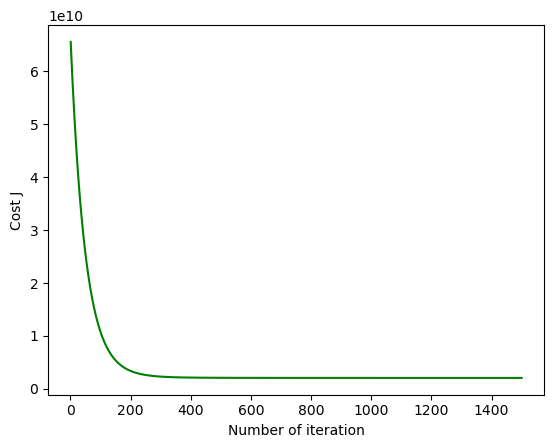

In [440]:
iteration_xM = np.linspace(1, 1500, 1500)
plt.figure()
plt.plot(iteration_xM,costM,color = 'g')
plt.xlabel('Number of iteration')
plt.ylabel('Cost J')

## 学习率

In [389]:
learningRateRange = np.logspace(-4, -1, 4)

In [390]:
learningRateRange

array([0.0001, 0.001 , 0.01  , 0.1   ])

In [400]:
a = np.zeros([2,2])

In [437]:
learningRateRange = np.logspace(-4, -1, 4)
iteration = 1500
costMR = np.zeros([len(learningRateRange),iteration])
i = 0
for item in learningRateRange:
    print(item)
    costM,thetaM = gradientDescentMultiple(xM,y,iteration,item)
    costMR[i,:] = costM
    i = i + 1

0.0001
0.001
0.01
0.1


In [430]:
costMR

array([[6.55915481e+10, 6.55785428e+10, 6.55655402e+10, ...,
        4.88766903e+10, 4.88671797e+10, 4.88576712e+10],
       [6.55915481e+10, 6.54615565e+10, 6.53318377e+10, ...,
        5.37599807e+09, 5.36973662e+09, 5.36348744e+09],
       [6.55915481e+10, 6.42977763e+10, 6.30310183e+10, ...,
        2.04328278e+09, 2.04328276e+09, 2.04328273e+09],
       [6.55915481e+10, 5.32682599e+10, 4.33890843e+10, ...,
        2.04328005e+09, 2.04328005e+09, 2.04328005e+09]])

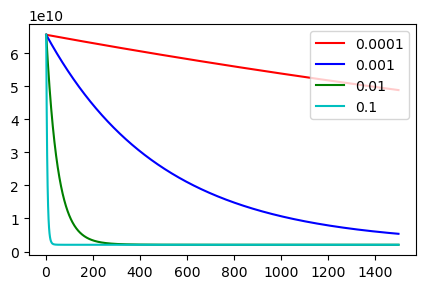

In [444]:
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(iteration_xM,costMR[0,:],color = 'r',label='0.0001')
ax.plot(iteration_xM,costMR[1,:],color = 'b',label='0.001')
ax.plot(iteration_xM,costMR[2,:],color = 'g',label='0.01')
ax.plot(iteration_xM,costMR[3,:],color = 'c',label='0.1')
ax.legend(loc=1)

## Normal Equations